In [30]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

In [31]:
#Read CSV
df = pd.read_csv('car_data.csv')
#Remove colums 'Car_name' and 'Owner'
df = df.drop(columns={'Car_Name', 'Owner'})

In [32]:
#Divide by sets
df_trainning = df[df['Set'] == 'Train']
df_validation = df[df['Set'] == 'Validation']
df_test = df[df['Set'] == 'Test']

#Probabilities
p_trainning = len(df_trainning['Set'])/len(df['Set'])
p_validation = len(df_validation['Set'])/len(df['Set'])
p_test = len(df_test['Set'])/len(df['Set'])

#Display
print(f'Probability of set: train, P: {p_trainning}')
print(f'Probability of set: validation, P: {p_validation}')
print(f'Probability of set: test, P: {p_test}')

Probability of set: train, P: 0.8970099667774086
Probability of set: validation, P: 0.03322259136212625
Probability of set: test, P: 0.06976744186046512


In [33]:
#Divide by categories
df_dealer = df[df['Seller_Type'] == 'Dealer']
df_fuel_diesel = df[df['Fuel_Type'] == 'Diesel']
df_fuel_gnc = df[df['Fuel_Type'] == 'CNG']
df_transmision = df[df['Transmission'] == 'Automatic']

#Probabilities
p_seller_dealer = len(df_dealer['Seller_Type'])/len(df['Seller_Type'])
p_fuel_diesel = len(df_fuel_diesel['Fuel_Type'])/len(df['Fuel_Type'])
p_fuel_gnc = len(df_fuel_gnc['Fuel_Type'])/len(df['Fuel_Type'])
p_transmission_auto = len(df_transmision['Transmission'])/len(df['Transmission'])

#Display
print(f'Probability of seller type: dealer, P = {p_seller_dealer}')
print(f'Probability of seller type: individual, P = {1 - p_seller_dealer}')
print(f'Probability of fuel type: diesel, P = {p_fuel_diesel}')
print(f'Probability of fuel type: gnc, P = {p_fuel_gnc}')
print(f'Probability of seller type: petrol, P = {1 - p_fuel_diesel - p_fuel_gnc}')
print(f'Probability of seller type: automatic, P = {p_transmission_auto}')
print(f'Probability of seller type: manual, P = {1 - p_transmission_auto}')

Probability of seller type: dealer, P = 0.6478405315614618
Probability of seller type: individual, P = 0.3521594684385382
Probability of fuel type: diesel, P = 0.19933554817275748
Probability of fuel type: gnc, P = 0.006644518272425249
Probability of seller type: petrol, P = 0.7940199335548173
Probability of seller type: automatic, P = 0.132890365448505
Probability of seller type: manual, P = 0.867109634551495


In [34]:
#b)Pre-procesamiento
#Categorical variables
categorical_features = ['Seller_Type', 'Fuel_Type', 'Transmission']
numeric_features = ['Year', 'Kms_Driven', 'Present_Price']
target = 'Selling_Price'

#Transformation definition:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first'), categorical_features),  #drop avoid collinearity
        ('num', PolynomialFeatures(degree=3, include_bias=False), numeric_features)  #3rd grade polynomial
    ]
)

#Normalization
scaler = StandardScaler()

MSE Train: 0.47269235594572834
MSE Validation: 0.5419991553998438


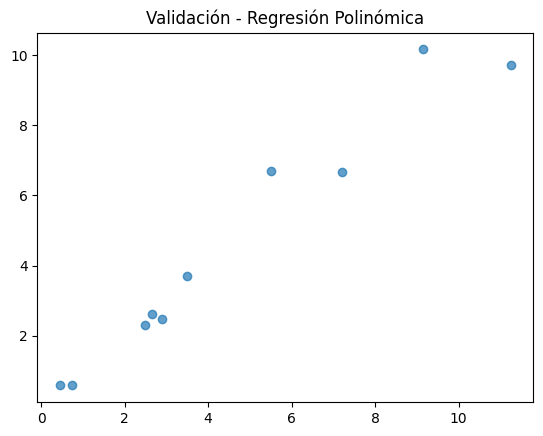

In [35]:
#c)Linear Regresion
#Complete pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('scaler', scaler),
    ('regressor', LinearRegression())
])

X_train = df_trainning.drop(columns=['Selling_Price', 'Set'])
y_train = df_trainning['Selling_Price']
X_val = df_validation.drop(columns=['Selling_Price', 'Set'])
y_val = df_validation['Selling_Price']
#Trinning with Train
model.fit(X_train, y_train)
#Predict
y_pred_train = model.predict(X_train)
y_pred_val = model.predict(X_val)
#Errors
mse_train = mean_squared_error(y_train, y_pred_train)
mse_val = mean_squared_error(y_val, y_pred_val)

print("MSE Train:", mse_train)
print("MSE Validation:", mse_val)

#Scatter plot Real vs Predict
plt.scatter(y_val, y_pred_val, alpha=0.7)
plt.title("Validación - Regresión Polinómica")
plt.show()


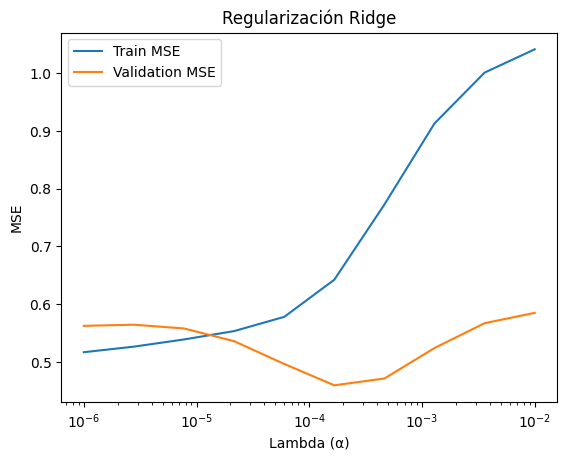

Best λ: 0.0001668100537200059 with MSE 0.4597646826128585


In [36]:
#d)Regularizacion
lambdas = np.logspace(-6, -2, 10)  #1e-6 < lambda < 1e-2
mse_train_list = []
mse_val_list = []

for lam in lambdas:
  #Dataset
    ridge_model = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('scaler', scaler),
        ('regressor', Ridge(alpha=lam))
    ])
    #Trainning
    ridge_model.fit(X_train, y_train)
    #Predict
    y_pred_train = ridge_model.predict(X_train)
    y_pred_val = ridge_model.predict(X_val)
    #Mean cuadratic error
    mse_train_list.append(mean_squared_error(y_train, y_pred_train))
    mse_val_list.append(mean_squared_error(y_val, y_pred_val))

#Plot MSE evolution through lambda
plt.plot(lambdas, mse_train_list, label="Train MSE")
plt.plot(lambdas, mse_val_list, label="Validation MSE")
plt.xscale("log")
plt.xlabel("Lambda (α)")
plt.ylabel("MSE")
plt.title("Regularización Ridge")
plt.legend()
plt.show()

#Best lambda
best_idx = np.argmin(mse_val_list)
print(f"Best λ: {lambdas[best_idx]} with MSE {mse_val_list[best_idx]}")
